In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wbdata
import datetime
import logging
from typing import Dict, Optional

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Add the parent directory to the system path 
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
from scripts.economic_analysis import *

In [4]:
oil_prices_df=pd.read_csv('../data/Copy of BrentOilPrices.csv')

## Economic Indicators 
 fetche and processes various economic indicators to analyze their influence on oil prices.

- GDP growth
- Inflation rates
- Unemployment rates
- Renewable energy consumption
- Environmental tax revenue
- Trade balance
- Natural gas usage
- Exchange rates for major currencies

In [5]:

logger.info("Starting data collection...")
indicator_data = fetch_all_indicators()
    
# Merge all indicators
merged_data = merge_indicators(indicator_data)

2024-11-10 14:32:38,105 - INFO - Starting data collection...
2024-11-10 14:32:38,126 - INFO - Successfully fetched GDP Growth (%) data
2024-11-10 14:32:38,126 - INFO - Successfully fetched Inflation Rate (%) data
2024-11-10 14:32:38,137 - INFO - Successfully fetched Unemployment Rate (%) data
2024-11-10 14:32:38,137 - INFO - Successfully fetched Exchange Rate (Local Currency per USD) data
2024-11-10 14:32:38,137 - INFO - Successfully fetched Renewable Energy Consumption (%) data
2024-11-10 14:32:38,153 - INFO - Successfully fetched Environmental Tax Revenue (% of GDP) data
2024-11-10 14:32:38,153 - INFO - Successfully fetched Net Trade (BoP, current US$) data
2024-11-10 14:32:38,168 - INFO - Successfully fetched Natural Gas Electricity Production (%) data
2024-11-10 14:32:38,184 - INFO - Successfully merged all indicators


In [6]:
# Display summary of collected data
for name, df in indicator_data.items():
    print(df.head())
        
print("\nMerged Data Summary:")
merged_data.head()
print(f"Final Shape: {merged_data.shape}")

                country       date  GDP Growth (%)
1  United Arab Emirates 2022-01-01    5.070640e+11
2  United Arab Emirates 2021-01-01    4.151788e+11
3  United Arab Emirates 2020-01-01    3.494730e+11
4  United Arab Emirates 2019-01-01    4.179897e+11
5  United Arab Emirates 2018-01-01    4.270494e+11
                country       date  Inflation Rate (%)
1  United Arab Emirates 2022-01-01          117.541088
2  United Arab Emirates 2021-01-01          112.127688
3  United Arab Emirates 2020-01-01          112.143231
4  United Arab Emirates 2019-01-01          114.524661
5  United Arab Emirates 2018-01-01          116.779773
                country       date  Unemployment Rate (%)
1  United Arab Emirates 2022-01-01                  2.873
2  United Arab Emirates 2021-01-01                  3.105
3  United Arab Emirates 2020-01-01                  4.294
4  United Arab Emirates 2019-01-01                  2.331
5  United Arab Emirates 2018-01-01                  2.236
                

In [7]:
merged_data.head()

,country,date,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),Exchange Rate (Local Currency per USD),Renewable Energy Consumption (%),Environmental Tax Revenue (% of GDP),"Net Trade (BoP, current US$)",Natural Gas Electricity Production (%)
0,China,1988-01-01,3.123536e+11,33.187245,NaN,3.722100,NaN,NaN,-4.060000e+09,0.376552
9,China,1989-01-01,3.477681e+11,39.242469,NaN,3.765108,NaN,NaN,-4.927000e+09,0.634223
18,China,1990-01-01,3.608579e+11,40.440263,NaN,4.783208,33.9,NaN,1.066800e+10,0.446023
27,China,1991-01-01,3.833733e+11,41.878596,2.37,5.323392,33.1,NaN,1.160100e+10,0.358458
36,China,1992-01-01,4.269157e+11,44.539554,2.37,5.514592,32.8,NaN,4.998000e+09,0.327158


In [8]:
merged_data.tail()

,country,date,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),Exchange Rate (Local Currency per USD),Renewable Energy Consumption (%),Environmental Tax Revenue (% of GDP),"Net Trade (BoP, current US$)",Natural Gas Electricity Production (%)
278,United States,2018-01-01,2.065652e+13,115.157303,3.896,1.0,9.9,0.713,-5.786000e+11,31.942161
287,United States,2019-01-01,2.152140e+13,117.244195,3.669,1.0,10.2,0.713,-5.593940e+11,31.942161
296,United States,2020-01-01,2.132295e+13,118.690502,8.055,1.0,11.0,0.713,-6.536940e+11,31.942161
305,United States,2021-01-01,2.359403e+13,124.266414,5.349,1.0,10.9,0.713,-8.480720e+11,31.942161
314,United States,2022-01-01,2.574411e+13,134.211206,3.650,1.0,10.9,0.713,-9.447700e+11,31.942161


In [9]:
merged_data.info()

<class 'wbdata.client.DataFrame'>
Index: 315 entries, 0 to 314
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   country                                 315 non-null    object        
 1   date                                    315 non-null    datetime64[ns]
 2   GDP Growth (%)                          315 non-null    float64       
 3   Inflation Rate (%)                      315 non-null    float64       
 4   Unemployment Rate (%)                   312 non-null    float64       
 5   Exchange Rate (Local Currency per USD)  315 non-null    float64       
 6   Renewable Energy Consumption (%)        313 non-null    float64       
 7   Environmental Tax Revenue (% of GDP)    291 non-null    float64       
 8   Net Trade (BoP, current US$)            315 non-null    float64       
 9   Natural Gas Electricity Production (%)  315 non-null    float64

In [10]:
numeric_columns = merged_data.select_dtypes(include='number').columns
#merged_data.fillna(merged_data.median(), inplace=True)
merged_data[numeric_columns] = merged_data[numeric_columns].fillna(merged_data[numeric_columns].median())


In [11]:
merged_data.head()

,country,date,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),Exchange Rate (Local Currency per USD),Renewable Energy Consumption (%),Environmental Tax Revenue (% of GDP),"Net Trade (BoP, current US$)",Natural Gas Electricity Production (%)
0,China,1988-01-01,3.123536e+11,33.187245,5.629,3.722100,1.1,1.391,-4.060000e+09,0.376552
9,China,1989-01-01,3.477681e+11,39.242469,5.629,3.765108,1.1,1.391,-4.927000e+09,0.634223
18,China,1990-01-01,3.608579e+11,40.440263,5.629,4.783208,33.9,1.391,1.066800e+10,0.446023
27,China,1991-01-01,3.833733e+11,41.878596,2.370,5.323392,33.1,1.391,1.160100e+10,0.358458
36,China,1992-01-01,4.269157e+11,44.539554,2.370,5.514592,32.8,1.391,4.998000e+09,0.327158


In [12]:
merged_data.isnull().sum()

country                                   0
date                                      0
GDP Growth (%)                            0
Inflation Rate (%)                        0
Unemployment Rate (%)                     0
Exchange Rate (Local Currency per USD)    0
Renewable Energy Consumption (%)          0
Environmental Tax Revenue (% of GDP)      0
Net Trade (BoP, current US$)              0
Natural Gas Electricity Production (%)    0
dtype: int64

In [13]:
merged_data.rename(columns={'date': 'Date'}, inplace=True)

In [ ]:
# to datetime
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
oil_prices_df['Date'] = pd.to_datetime(oil_prices_df['Date'])

In [16]:
final_df = merge_with_oil_prices(merged_data, oil_prices_df)

In [17]:
final_df.head()

,country,Date,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),Exchange Rate (Local Currency per USD),Renewable Energy Consumption (%),Environmental Tax Revenue (% of GDP),"Net Trade (BoP, current US$)",Natural Gas Electricity Production (%),year,Price
0,China,1988-01-01,3.123536e+11,33.187245,5.629,3.7221,1.1,1.391,-4.060000e+09,0.376552,1988,17.95
1,China,1988-01-01,3.123536e+11,33.187245,5.629,3.7221,1.1,1.391,-4.060000e+09,0.376552,1988,17.08
2,China,1988-01-01,3.123536e+11,33.187245,5.629,3.7221,1.1,1.391,-4.060000e+09,0.376552,1988,17.90
3,China,1988-01-01,3.123536e+11,33.187245,5.629,3.7221,1.1,1.391,-4.060000e+09,0.376552,1988,16.88
4,China,1988-01-01,3.123536e+11,33.187245,5.629,3.7221,1.1,1.391,-4.060000e+09,0.376552,1988,16.65


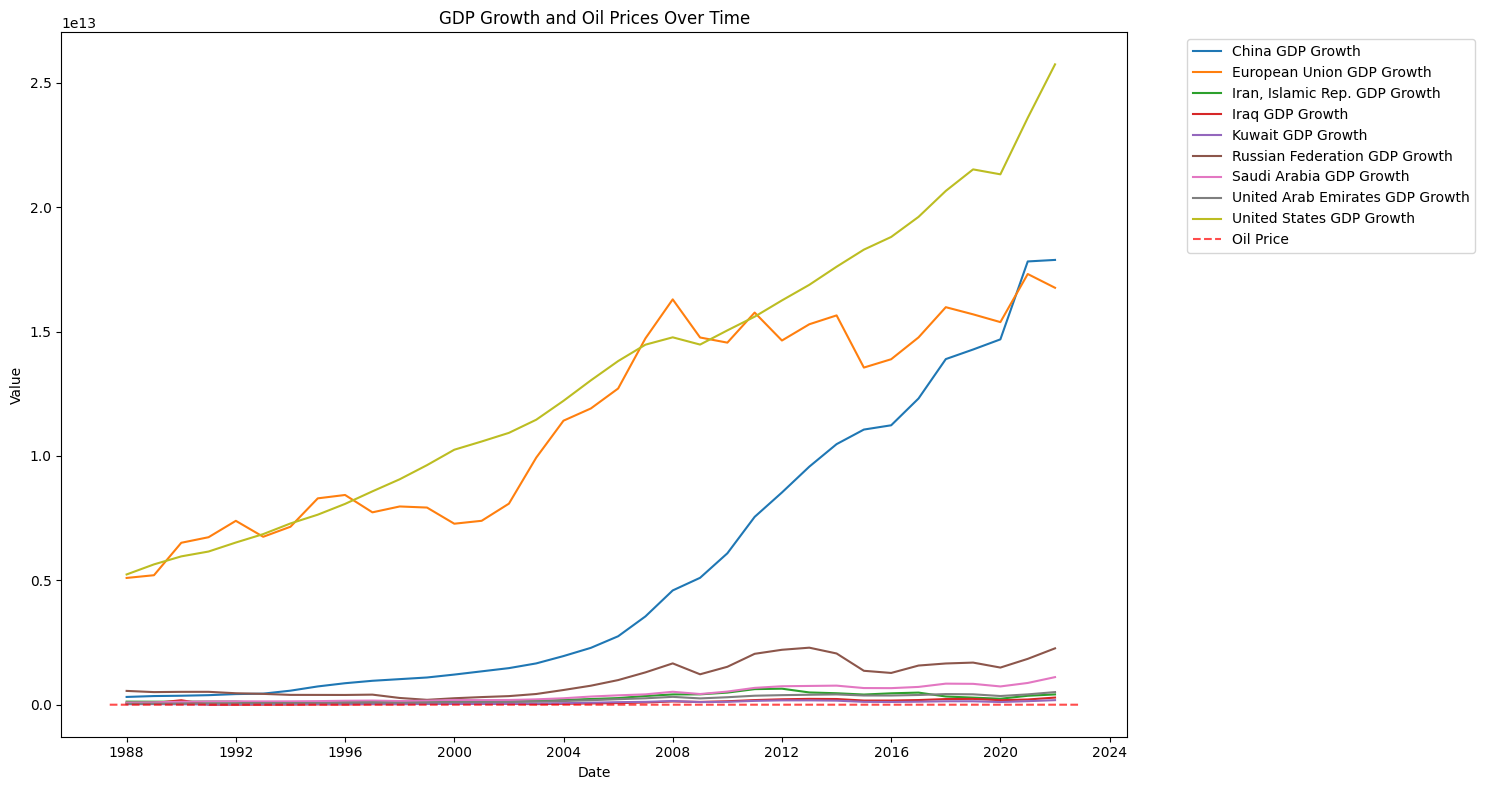

2024-11-10 14:32:39,216 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-10 14:32:39,228 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


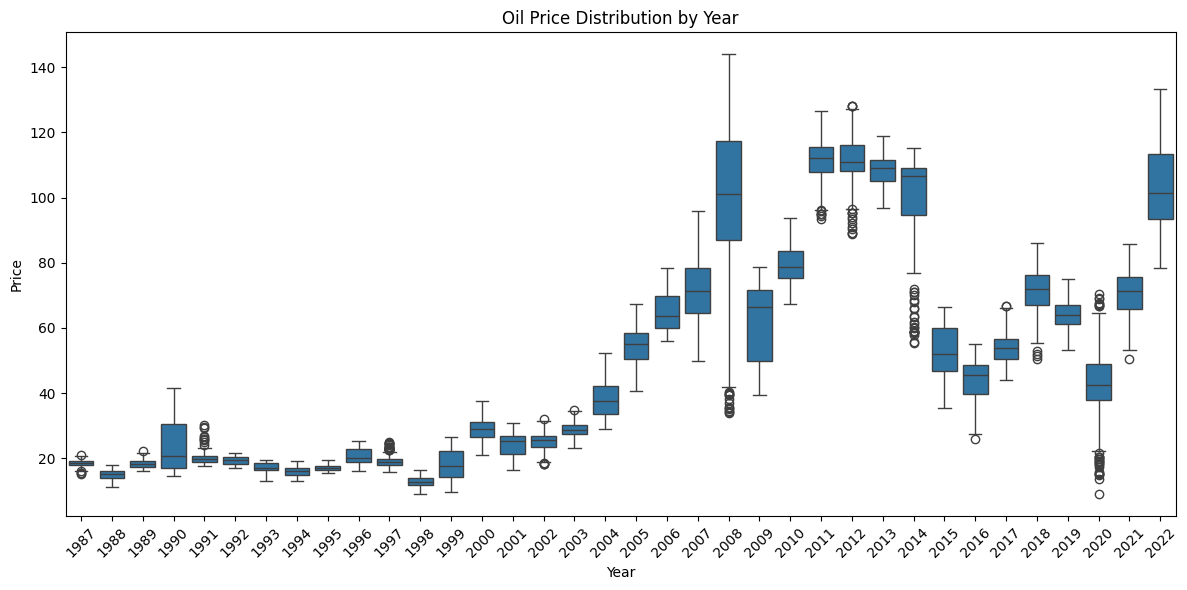

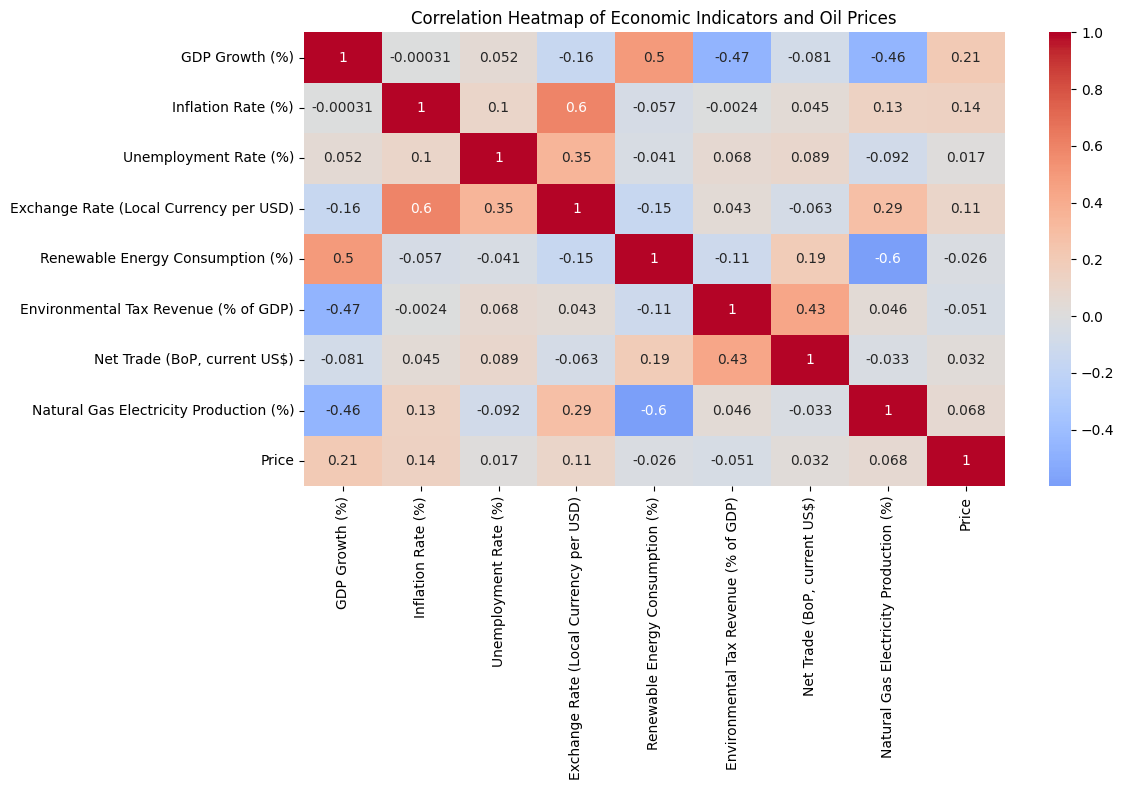

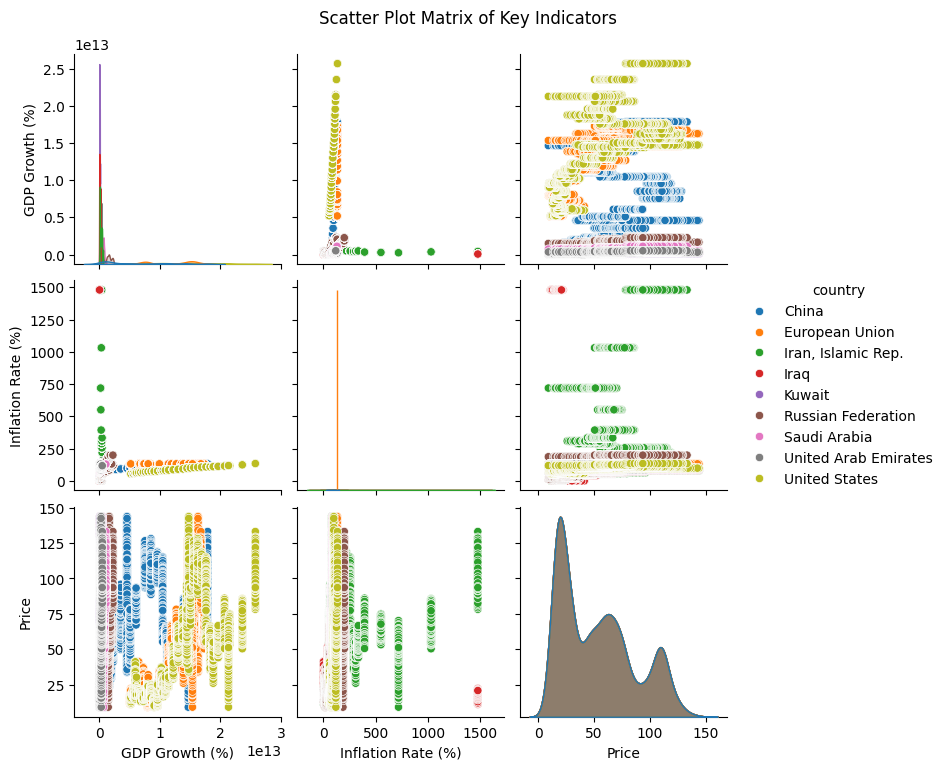

In [18]:
# Create visualizations
create_visualizations(final_df, oil_prices_df)

In [19]:
# Perform correlation analysis
correlation_results = perform_correlation_analysis(final_df)

<Figure size 1500x800 with 0 Axes>

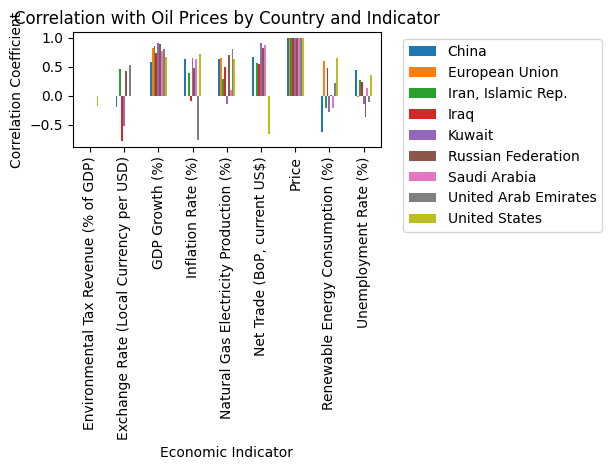

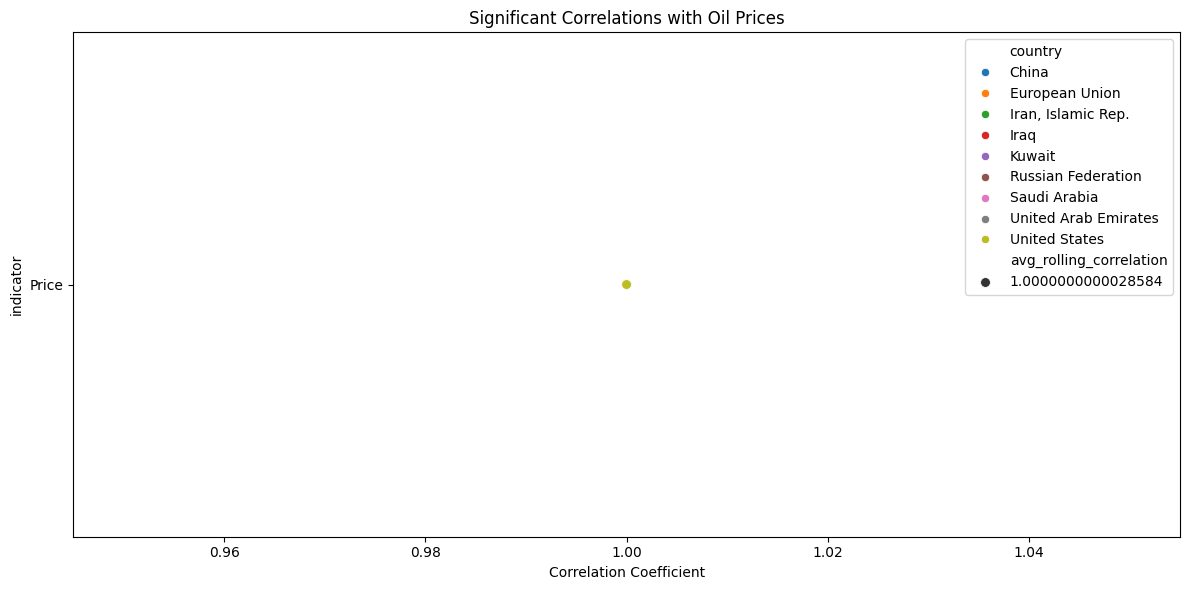

In [20]:
# Plot correlation analysis results
plot_correlation_analysis(correlation_results)

In [21]:
# Print detailed correlation results
print("\nDetailed Correlation Analysis Results:")
print(correlation_results.sort_values('abs_correlation', ascending=False)
          .to_string(index=False))


Detailed Correlation Analysis Results:
             country                              indicator  correlation  abs_correlation       p_value  significant correlation_strength  avg_rolling_correlation
                Iraq                                  Price     1.000000         1.000000  0.000000e+00         True               Strong                      1.0
      European Union                                  Price     1.000000         1.000000  0.000000e+00         True               Strong                      1.0
               China                                  Price     1.000000         1.000000  0.000000e+00         True               Strong                      1.0
       United States                                  Price     1.000000         1.000000  0.000000e+00         True               Strong                      1.0
United Arab Emirates                                  Price     1.000000         1.000000  0.000000e+00         True               Strong        

In [22]:
# Print summary of strongest correlations
print("\nStrongest Correlations with Oil Prices:")
strong_correlations = correlation_results[
     correlation_results['correlation_strength'] == 'Strong'
].sort_values('abs_correlation', ascending=False)
print(strong_correlations.to_string(index=False))


Strongest Correlations with Oil Prices:
             country                              indicator  correlation  abs_correlation  p_value  significant correlation_strength  avg_rolling_correlation
               China                                  Price     1.000000         1.000000      0.0         True               Strong                      1.0
      European Union                                  Price     1.000000         1.000000      0.0         True               Strong                      1.0
                Iraq                                  Price     1.000000         1.000000      0.0         True               Strong                      1.0
  Iran, Islamic Rep.                                  Price     1.000000         1.000000      0.0         True               Strong                      1.0
        Saudi Arabia                                  Price     1.000000         1.000000      0.0         True               Strong                      1.0
United Arab

#### Oil Prices and GDP Growth

Correlation between Brent Oil Prices and GDP Growth: 0.21


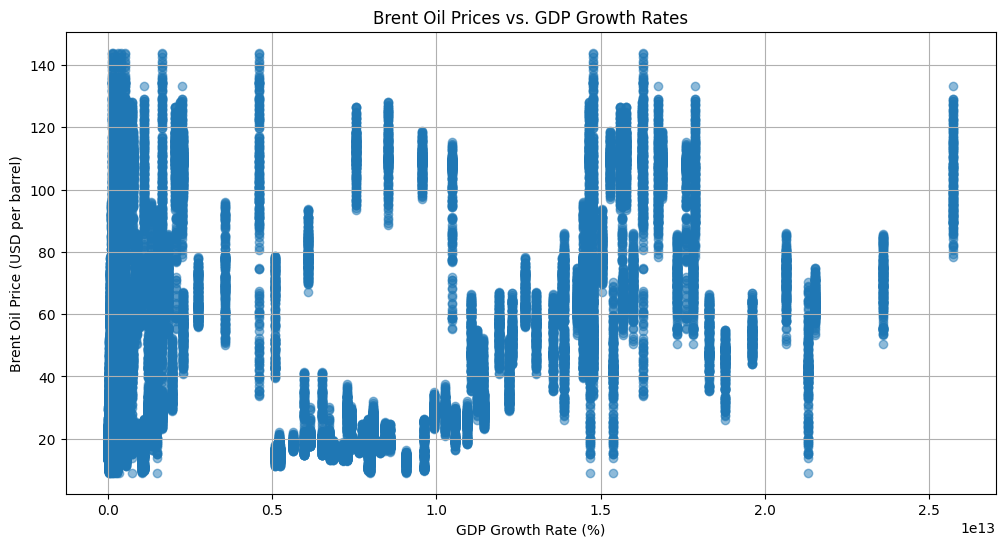

In [23]:
correlation = final_df['Price'].corr(final_df['GDP Growth (%)'])
print(f"Correlation between Brent Oil Prices and GDP Growth: {correlation:.2f}")

#Visualize the relationship
plt.figure(figsize=(12, 6))
plt.scatter(final_df['GDP Growth (%)'], final_df['Price'], alpha=0.5, marker='o')
plt.title('Brent Oil Prices vs. GDP Growth Rates')
plt.xlabel('GDP Growth Rate (%)')
plt.ylabel('Brent Oil Price (USD per barrel)')
plt.grid(True)
plt.show()


#### Oil Prices and Inflation Rate

Correlation between Brent Oil Prices and Inflation Rate: 0.14


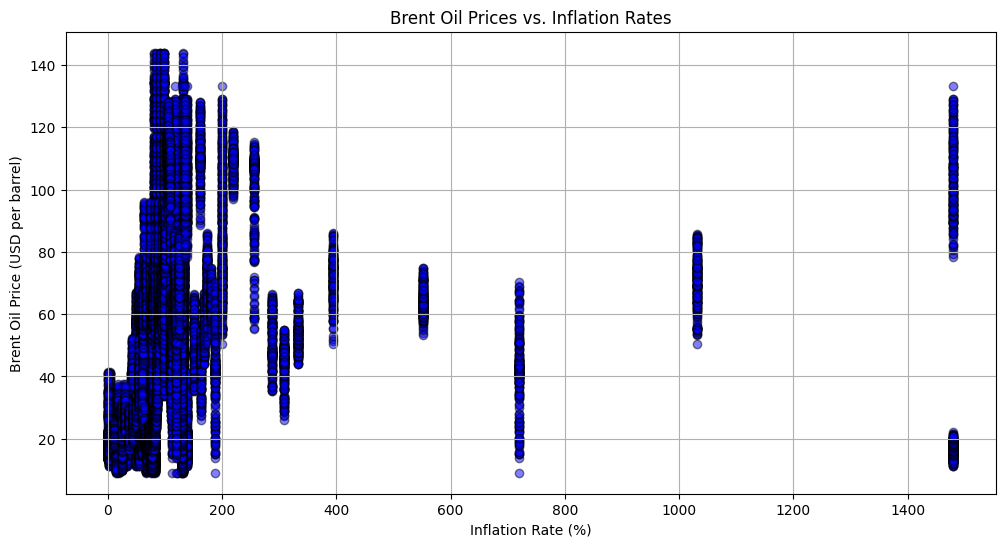

In [24]:
correlation = final_df['Price'].corr(final_df['Inflation Rate (%)'])
print(f"Correlation between Brent Oil Prices and Inflation Rate: {correlation:.2f}")

# Visualize the relationship
plt.figure(figsize=(12, 6))
plt.scatter(final_df['Inflation Rate (%)'], final_df['Price'], alpha=0.5, color='blue', edgecolor='black')
plt.title('Brent Oil Prices vs. Inflation Rates')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('Brent Oil Price (USD per barrel)')
plt.grid(True)
plt.show()


#### Oil Prices and Unemployment Rate

Correlation between Brent Oil Prices and Unemployment Rate: 0.02


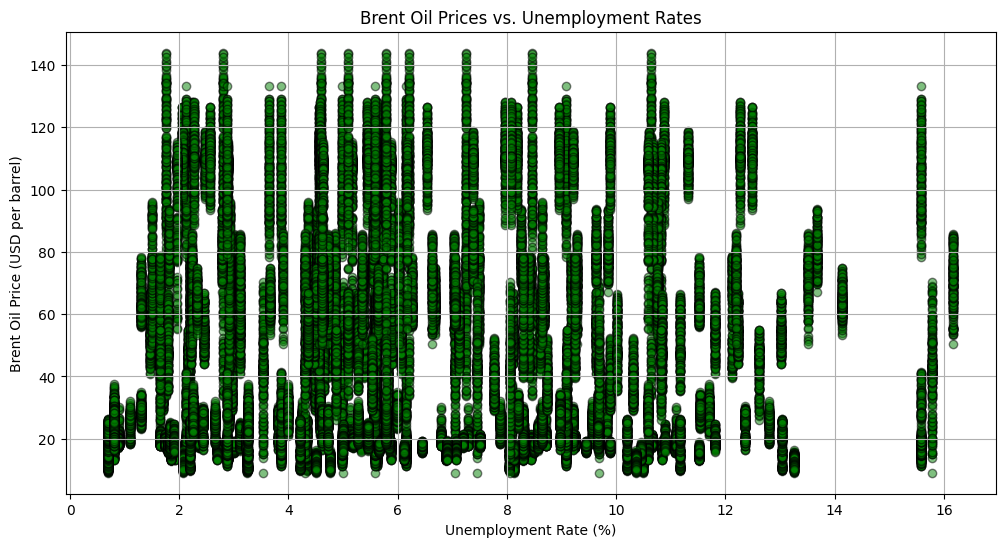

In [25]:
# Calculate the correlation
correlation = final_df['Price'].corr(final_df['Unemployment Rate (%)'])
print(f"Correlation between Brent Oil Prices and Unemployment Rate: {correlation:.2f}")

# Visualize the relationship
plt.figure(figsize=(12, 6))
plt.scatter(final_df['Unemployment Rate (%)'], final_df['Price'], alpha=0.5, color='green', edgecolor='black')
plt.title('Brent Oil Prices vs. Unemployment Rates')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Brent Oil Price (USD per barrel)')
plt.grid(True)
plt.show()

### Oil Prices and Exchange Rate

Correlation between Brent Oil Prices and Exchange Rate: 0.11


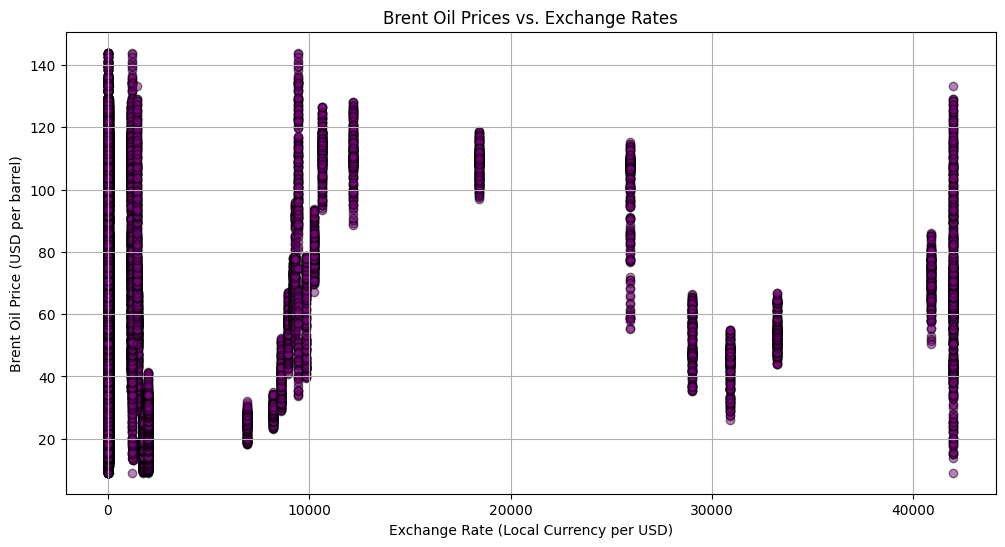

In [26]:
# Calculate the correlation
correlation = final_df['Price'].corr(final_df['Exchange Rate (Local Currency per USD)'])
print(f"Correlation between Brent Oil Prices and Exchange Rate: {correlation:.2f}")

# Visualize the relationship
plt.figure(figsize=(12, 6))
plt.scatter(final_df['Exchange Rate (Local Currency per USD)'], final_df['Price'], alpha=0.5, color='purple', edgecolor='black')
plt.title('Brent Oil Prices vs. Exchange Rates')
plt.xlabel('Exchange Rate (Local Currency per USD)')
plt.ylabel('Brent Oil Price (USD per barrel)')
plt.grid(True)
plt.show()


### Oil Prices and Natural Gas Electricity Production

Correlation between Brent Oil Prices and Renewable Energy Consumption: 0.07


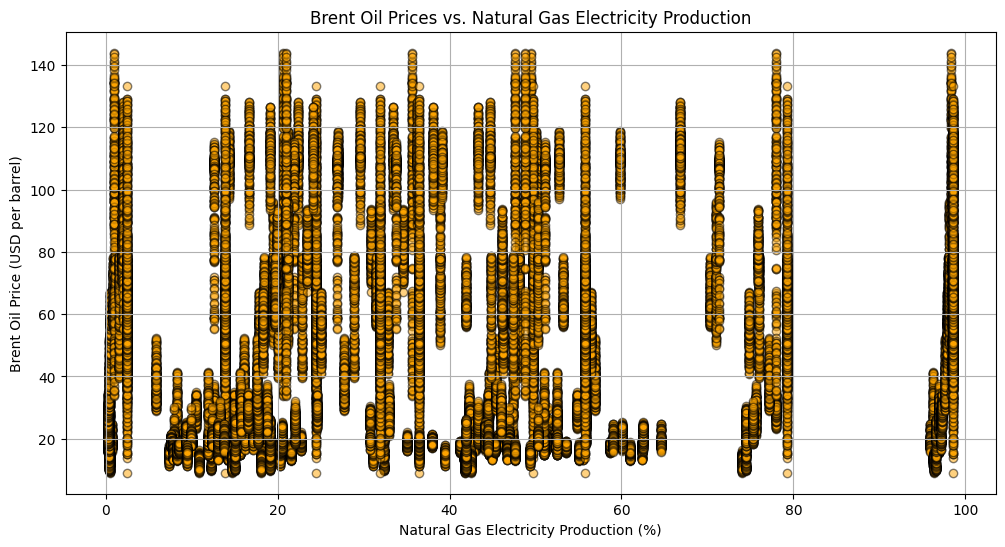

In [28]:
# Calculate the correlation
correlation = final_df['Price'].corr(final_df['Natural Gas Electricity Production (%)'])
print(f"Correlation between Brent Oil Prices and Renewable Energy Consumption: {correlation:.2f}")

# Visualize the relationship
plt.figure(figsize=(12, 6))
plt.scatter(final_df['Natural Gas Electricity Production (%)'], final_df['Price'], alpha=0.5, color='orange', edgecolor='black')
plt.title('Brent Oil Prices vs. Natural Gas Electricity Production')
plt.xlabel('Natural Gas Electricity Production (%)')
plt.ylabel('Brent Oil Price (USD per barrel)')
plt.grid(True)
plt.show()

### Oil Prices and Renewable Energy Consumption

Correlation between Brent Oil Prices and Renewable Energy Consumption: -0.03


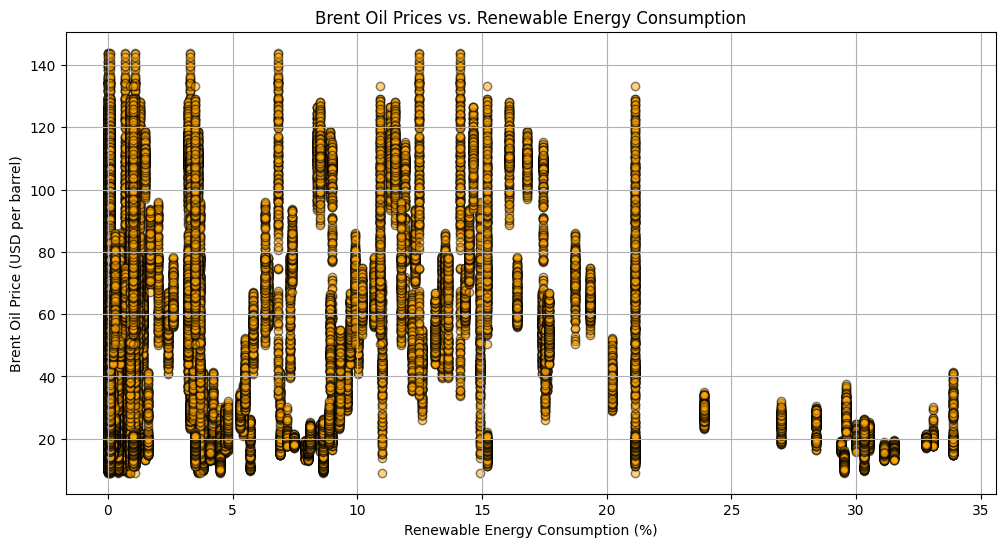

In [29]:
# Calculate the correlation
correlation = final_df['Price'].corr(final_df['Renewable Energy Consumption (%)'])
print(f"Correlation between Brent Oil Prices and Renewable Energy Consumption: {correlation:.2f}")

# Visualize the relationship
plt.figure(figsize=(12, 6))
plt.scatter(final_df['Renewable Energy Consumption (%)'], final_df['Price'], alpha=0.5, color='orange', edgecolor='black')
plt.title('Brent Oil Prices vs. Renewable Energy Consumption')
plt.xlabel('Renewable Energy Consumption (%)')
plt.ylabel('Brent Oil Price (USD per barrel)')
plt.grid(True)
plt.show()

In [30]:
final_df=final_df.to_csv('../data/final_merged_data.csv')